# Лабораторная работа №1: Первичное исследование данных

## 1. Постановка задачи

### Описание датасета
Данный датасет содержит информацию о лауреатах Нобелевской премии, начиная с 1901 года. В нем представлены различные характеристики лауреатов: год получения премии, категория, возраст, пол, место рождения и другие данные. Эти данные включают как числовые, так и категориальные признаки, такие как возраст, пол и категория премии.

### Условный заказчик
Условными заказчиками могут быть исследовательские организации, образовательные учреждения или научные команды, которые хотят проанализировать тенденции среди лауреатов Нобелевской премии, чтобы выявить закономерности, которые могут быть полезны для дальнейших исследований или решений в сфере образования и науки.

### Возможные задачи ИАД
1. Сегментация лауреатов: разделение лауреатов на группы по возрасту получения премии, категории и стране рождения для выявления типичных «портретов» лауреата в разных областях.
2. Поиск аномалий: выявление необычных случаев, например, очень молодых или очень возрастных лауреатов, а также стран, неожиданно получивших много премий в определённый период.
3. Описательная аналитика: анализ динамики присуждения премий по десятилетиям, сравнение гендерного состава лауреатов в разных категориях, выявление стран-лидеров по количеству премий.

## 2. Паспорт датасета

### Загрузка данных

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('../data/SDnobel.csv', sep=';')  # Путь к вашему файлу
print(f'Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов')
df.head()

Размер датасета: 911 строк, 23 столбцов


,Column1,year,category,prize,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female,age,age_group
0,0,1901,Chemistry,The Nobel Prize in Chemistry 1901,01.01.2026,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Berlin,Germany,01.03.1911,Berlin,Germany,ЛОЖЬ,1900,ЛОЖЬ,49.0,Adult
1,1,1901,Literature,The Nobel Prize in Literature 1901,01.01.2026,569,Individual,Sully Prudhomme,1839-03-16,Paris,...,NaN,NaN,07.09.1907,Ch?tenay,France,ЛОЖЬ,1900,ЛОЖЬ,62.0,Adult
2,2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,01.01.2026,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Marburg,Germany,31.03.1917,Marburg,Germany,ЛОЖЬ,1900,ЛОЖЬ,47.0,Adult
3,3,1901,Peace,The Nobel Peace Prize 1901,01.02.2026,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,...,NaN,NaN,30.10.1910,Heiden,Switzerland,ЛОЖЬ,1900,ЛОЖЬ,73.0,Senior
4,4,1901,Peace,The Nobel Peace Prize 1901,01.02.2026,463,Individual,Fr?d?ric Passy,1822-05-20,Paris,...,NaN,NaN,12.06.1912,Paris,France,ЛОЖЬ,1900,ЛОЖЬ,79.0,Senior


### Структура данных

In [7]:
# Информация о столбцах и типах
df.info()

# Статистика по числовым признакам
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Column1               911 non-null    int64  
 1   year                  911 non-null    int64  
 2   category              911 non-null    str    
 3   prize                 911 non-null    str    
 4   prize_share           911 non-null    str    
 5   laureate_id           911 non-null    int64  
 6   laureate_type         911 non-null    str    
 7   full_name             911 non-null    str    
 8   birth_date            883 non-null    str    
 9   birth_city            883 non-null    str    
 10  birth_country         885 non-null    str    
 11  sex                   885 non-null    str    
 12  organization_name     665 non-null    str    
 13  organization_city     667 non-null    str    
 14  organization_country  667 non-null    str    
 15  death_date            593 non-null

,Column1,year,laureate_id,decade,age
count,911.000000,911.000000,911.000000,911.000000,883.000000
mean,455.000000,1969.201976,462.515917,1964.698134,59.453001
std,263.127346,32.837978,270.236159,32.998368,12.399290
min,0.000000,1901.000000,1.000000,1900.000000,17.000000
25%,227.500000,1946.000000,228.500000,1940.000000,50.000000
50%,455.000000,1975.000000,457.000000,1970.000000,60.000000
75%,682.500000,1997.000000,698.500000,1990.000000,69.000000
max,910.000000,2016.000000,937.000000,2010.000000,90.000000


### Список признаков с типами и описанием

In [18]:
# Создание таблицы признаков
features_df = pd.DataFrame({
    'Признак': df.columns,
    'Тип (pandas)': df.dtypes.values,
    'Пример значения': [df[col].iloc[0] for col in df.columns]
})

# Описание
description = {
    'Column1': 'Индекс строки',
    'year': 'Год присуждения премии',
    'category': 'Категория премии',
    'prize': 'Название премии',
    'prize_share': 'Доля премии',
    'laureate_id': 'Уникальный ID лауреата',
    'laureate_type': 'Тип лауреата',
    'full_name': 'Полное имя',
    'birth_date': 'Дата рождения',
    'birth_city': 'Город рождения',
    'birth_country': 'Страна рождения',
    'sex': 'Пол',
    'organization_name': 'Название организации',
    'organization_city': 'Город организации',
    'organization_country': 'Страна организации',
    'death_date': 'Дата смерти',
    'death_city': 'Город смерти',
    'death_country': 'Страна смерти',
    'usa_born_winner': 'Родился в США',
    'decade': 'Десятилетие',
    'female': 'Женщина',
    'age': 'Возраст получения премии',
    'age_group': 'Возрастная группа'
}

# Добавляем описание в таблицу
features_df['Смысл признака'] = features_df['Признак'].map(description)

# Выводим результат
features_df

,Признак,Тип (pandas),Пример значения,Смысл признака
0,Column1,int64,0,Индекс строки
1,year,int64,1901,Год присуждения премии
2,category,str,Chemistry,Категория премии
3,prize,str,The Nobel Prize in Chemistry 1901,Название премии
4,prize_share,str,01.01.2026,Доля премии
5,laureate_id,int64,160,Уникальный ID лауреата
6,laureate_type,str,Individual,Тип лауреата (Individual/Organization)
7,full_name,str,Jacobus Henricus van 't Hoff,Полное имя
8,birth_date,str,1852-08-30,Дата рождения
9,birth_city,str,Rotterdam,Город рождения


In [20]:
# Создаём копию датафрейма для преобразований
df_clean = df.copy()

# 1. Преобразование числовых столбцов
df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce')
df_clean['age'] = pd.to_numeric(df_clean['age'], errors='coerce')
df_clean['laureate_id'] = pd.to_numeric(df_clean['laureate_id'], errors='coerce')

# 2. Преобразование дат
df_clean['birth_date'] = pd.to_datetime(df_clean['birth_date'], errors='coerce')
df_clean['death_date'] = pd.to_datetime(df_clean['death_date'], errors='coerce')

# 3. Преобразование категориальных столбцов
categorical_columns = ['category', 'laureate_type', 'sex', 'age_group']
for col in categorical_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype('category')

# 4. Проверка результатов
print("Типы данных после преобразования:")
print(df_clean.dtypes)

Типы данных после преобразования:
Column1                          int64
year                             int64
category                      category
prize                              str
prize_share                        str
laureate_id                      int64
laureate_type                 category
full_name                          str
birth_date              datetime64[us]
birth_city                         str
birth_country                      str
sex                           category
organization_name                  str
organization_city                  str
organization_country               str
death_date              datetime64[us]
death_city                         str
death_country                      str
usa_born_winner                    str
decade                           int64
female                             str
age                            float64
age_group                     category
dtype: object


## 3. Аудит качества данных

### 3.1. Пропуски

In [43]:
# Пропуски по столбцам
missing = pd.DataFrame({
    'Пропуски': df.isnull().sum(),
    'Доля (%)': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Пропуски', ascending=False)

missing[missing['Пропуски'] > 0]

,Пропуски,Доля (%)
death_city,335,36.77
death_country,329,36.11
death_date,318,34.91
organization_name,246,27.00
organization_country,244,26.78
organization_city,244,26.78
birth_city,28,3.07
age,28,3.07
birth_date,28,3.07
sex,26,2.85


### 3.2. Дубликаты

In [22]:
duplicates = df.duplicated().sum()
print(f'Полных дубликатов строк: {duplicates}')

Полных дубликатов строк: 0


### 3.3. Выбросы (пример для одного признака)

Выбросов по методу IQR: 1


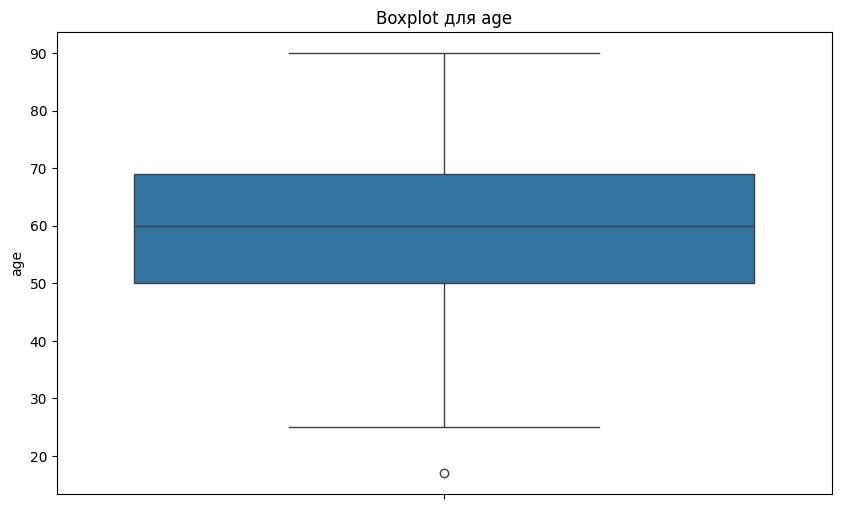

In [24]:
# Замените 'your_numeric_column' на реальное название столбца
column = 'age'
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
print(f'Выбросов по методу IQR: {len(outliers)}')

# Визуализация
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y=column)
plt.title(f'Boxplot для {column}')
plt.show()

## 4. Разведочный анализ (EDA)

### 4.1. Распределение числового признака

Статистика для возраста:
Средний возраст: 59.5
Медианный возраст: 60.0
Мин-макс: 17 - 90


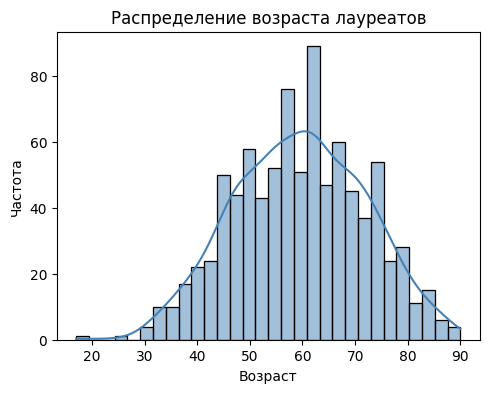

In [35]:
# Анализ числового признака - возраст
numeric_col = 'age'

# Проверяем, есть ли такой столбец
if numeric_col in df.columns:
    plt.figure(figsize=(12, 4))
    
    # Гистограмма с KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[numeric_col].dropna(), kde=True, bins=30, color='steelblue')
    plt.title(f'Распределение возраста лауреатов')
    plt.xlabel('Возраст')
    plt.ylabel('Частота')
    
    # Статистика
    print(f"Статистика для возраста:")
    print(f"Средний возраст: {df[numeric_col].mean():.1f}")
    print(f"Медианный возраст: {df[numeric_col].median():.1f}")
    print(f"Мин-макс: {df[numeric_col].min():.0f} - {df[numeric_col].max():.0f}")
else:
    print(f"Столбец '{numeric_col}' не найден. Доступные числовые столбцы:")
    print(df.select_dtypes(include=[np.number]).columns.tolist())

#### Выводы по распределению возраста:

Что видно на графике:
- Распределение возраста лауреатов имеет пик в районе 55-63 лет
- Большинство лауреатов получают премию в возрасте от 45 до 75 лет
- Средний возраст составляет 59.5 лет, медианный - 60 лет

Какие гипотезы можно сформулировать:
- Нобелевская премия обычно требует многолетних научных достижений, поэтому пик приходится на зрелый возраст
- Молодые лауреаты (до 30 лет) - это исключительные случаи, связанные либо с выдающимися открытиями, либо с особыми категориями (например, премия мира)
- Наличие возрастных лауреатов (80+ лет) говорит о том, что премию могут давать за достижения всей жизни

Какие вопросы возникают:
- В каких категориях лауреаты моложе всего?
- Меняется ли возраст лауреатов с течением времени?

### 4.2. Анализ категориального признака

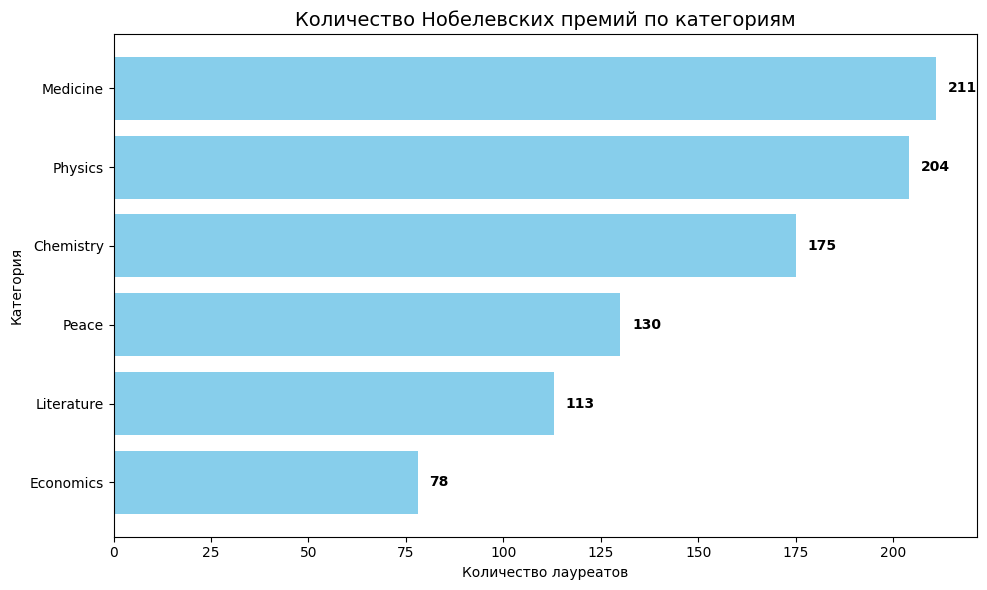

Всего категорий: 6
Самая частая категория: Medicine (211 лауреатов)
Самая редкая категория: Economics (78 лауреатов)


In [36]:
# Анализ категориального признака - категория премии
cat_col = 'category'

# Проверяем, есть ли такой столбец
if cat_col in df.columns:
    plt.figure(figsize=(10, 6))
    
    # Считаем частоты категорий
    category_counts = df[cat_col].value_counts().sort_values(ascending=True)
    
    # Горизонтальная столбчатая диаграмма
    bars = plt.barh(category_counts.index, category_counts.values, color='skyblue')
    plt.title('Количество Нобелевских премий по категориям', fontsize=14)
    plt.xlabel('Количество лауреатов')
    plt.ylabel('Категория')
    
    # Добавляем подписи с количеством
    for i, (cat, count) in enumerate(category_counts.items()):
        plt.text(count + 3, i, str(count), va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Всего категорий: {len(category_counts)}")
    print(f"Самая частая категория: {category_counts.index[-1]} ({category_counts.values[-1]} лауреатов)")
    print(f"Самая редкая категория: {category_counts.index[0]} ({category_counts.values[0]} лауреатов)")
else:
    print(f"Столбец '{cat_col}' не найден. Доступные категориальные столбцы:")
    cat_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    print(cat_columns)

Что видно на графике:
- Медицина, физика и химия - безусловные лидеры по количеству премий, значительно опережающие остальные категории
- Премия мира и литература занимают промежуточное положение, заметно уступая лидерам, но с небольшим отрывом друг от друга
- Экономика замыкает список, имея наименьшее число лауреатов среди всех категорий

Какие гипотезы можно сформулировать:
- Естественные науки (медицина, физика, химия) либо чаще становятся объектом для награждения, либо в этих областях больше номинантов и кандидатов
- Премия мира и литература могут иметь более строгие критерии отбора, что объясняет меньшее количество лауреатов
- Экономика могла быть добавлена позже, либо в этой области премии присуждаются реже

Какие вопросы возникают:
- Как распределяются премии по годам в разных категориях?
- Может ли разница объясняться тем, что в естественных науках премии чаще делятся между несколькими лауреатами?
- - Есть ли связь между количеством премий в категории и тем, как часто в ней присуждают награды организациям. а не отдельным лицам?

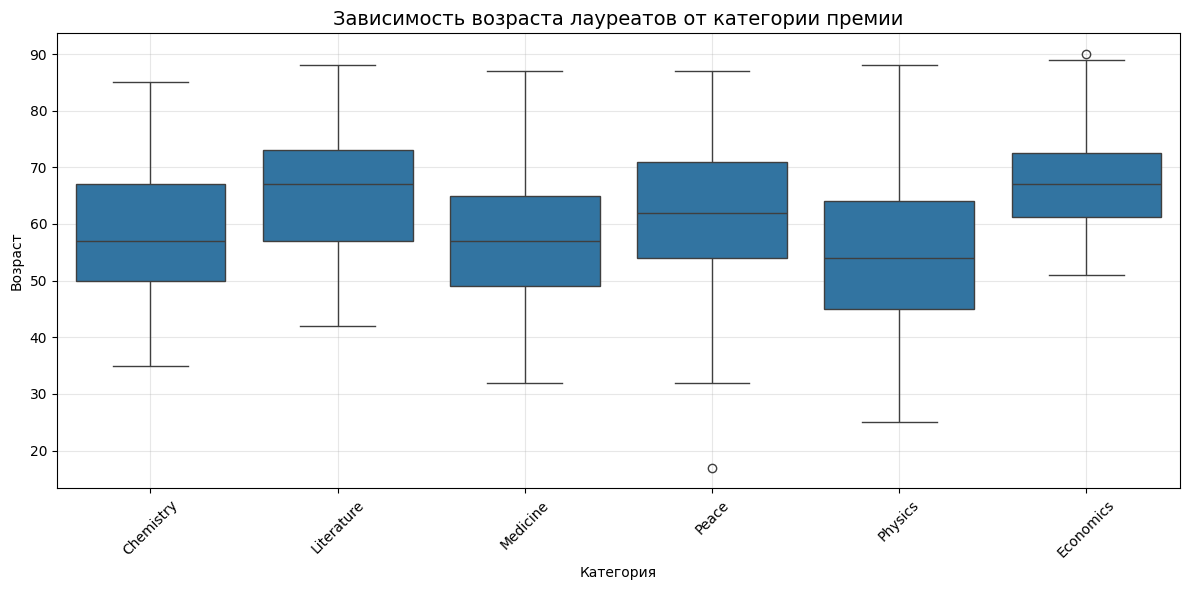

Средний возраст по категориям:
category
Economics     67.1
Literature    64.7
Peace         61.4
Chemistry     58.0
Medicine      58.0
Physics       55.4
Name: age, dtype: float64

Медианный возраст по категориям:
category
Economics     67.0
Literature    67.0
Peace         62.0
Chemistry     57.0
Medicine      57.0
Physics       54.0
Name: age, dtype: float64


In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='category', y='age')
plt.title('Зависимость возраста лауреатов от категории премии', fontsize=14)
plt.xlabel('Категория')
plt.ylabel('Возраст')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Дополнительная статистика
print("Средний возраст по категориям:")
print(df.groupby('category')['age'].mean().sort_values(ascending=False).round(1))
print("\nМедианный возраст по категориям:")
print(df.groupby('category')['age'].median().sort_values(ascending=False).round(1))

#### Выводы по зависимости возраста от категории:

Что видно на графике:
- Самые высокие значения возраста наблюдаются в категории экономика
- Лауреаты премии мира и литературы также получают премии в достаточно зрелом возрасте
- Самые молодые лауреаты - в категории физика
- Наибольший разброс возрастов наблюдается в категориях физика, медицина и премия мира

Какие гипотезы можно сформулировать:
- В естественных науках прорывные открытия часто делаются в относительно молодом возрасте, и признание приходит быстрее
- В экономике и литературе требуется больше времени для накопления знаний, опыта и создания значимых работ
- Премия мира может доставаться как молодым активистам, так и возрастным политикам — отсюда большой разброс значений

Какие вопросы возникают:
- Менялся ли возраст лауреатов с течением времени в разных категориях?
- Есть ли гендерные различия в возрасте получения премии?

## 5. Выводы

Детали в файле `report/quality_report.md`